In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
# import data
Fake_news = pd.read_csv("Resources/Fake.csv")
True_news = pd.read_csv("Resources/True.csv")

In [3]:
Fake_news['target'] = 0
Fake_news

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [4]:
True_news['target'] = 1
True_news

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [5]:
# Combine datasets
combined = pd.concat([True_news, Fake_news]).reset_index(drop = True)
combined

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [6]:
# update subject column contents from 'politics' to 'politicsNews' since they are the same category
combined['subject'] = combined['subject'].replace(['politics'],'politicsNews')
combined

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [7]:
#export data 
combined.to_csv('combined_data.csv')

In [8]:
# saving xlsx file to be used in Tableau
combined_data = pd.ExcelWriter('combined_data.xlsx') 
combined.to_excel(combined_data, index = False) 
  
combined_data.save() 

### Word Cloud

In [9]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

### Fake_news World Cloud

In [10]:
fake_news = Fake_news['title']

In [11]:
docs = Fake_news['title'].fillna('').str.lower().str.replace('[^a-z ]', '')
docs.head()

0     donald trump sends out embarrassing new years...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes an internet joke...
3     trump is so obsessed he even has obamas name ...
4     pope francis just called out donald trump dur...
Name: title, dtype: object

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/q/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# REMOVE STOPWORDS
stop_words=nltk.corpus.stopwords.words('english')
print('number of stop words = ',len(stop_words))

len(stop_words)
def clean_text(row):
    row_words=row.split(' ')
    clean_words=[word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)

docs_clean=docs.apply(clean_text)
docs_clean.head(1)

number of stop words =  179


0     donald trump sends embarrassing new years eve...
Name: title, dtype: object

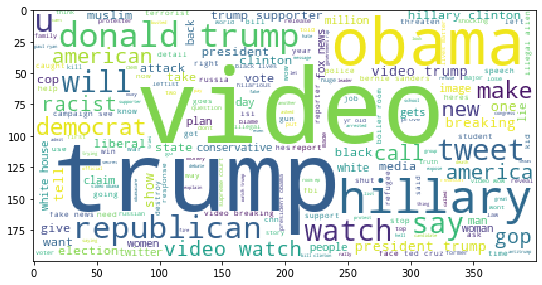

<Figure size 432x288 with 0 Axes>

In [23]:
from wordcloud import WordCloud
wc=WordCloud(background_color = 'white').generate(' '.join(docs))
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.show()
plt.savefig("fake_news_top_words.png")

### True_news World Cloud

In [16]:
true_news = True_news['title']

In [17]:
docs1 = True_news['title'].fillna('').str.lower().str.replace('[^a-z ]', '')
docs1.head()

0    as us budget fight looms republicans flip thei...
1    us military to accept transgender recruits on ...
2    senior us republican senator let mr mueller do...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge much more...
Name: title, dtype: object

In [19]:
# REMOVE STOPWORDS
stop_words=nltk.corpus.stopwords.words('english')
print('number of stop words = ',len(stop_words))

len(stop_words)
def clean_text(row):
    row_words=row.split(' ')
    clean_words=[word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)

docs_clean=docs1.apply(clean_text)
docs_clean.head(1)

number of stop words =  179


0    us budget fight looms republicans flip fiscal ...
Name: title, dtype: object

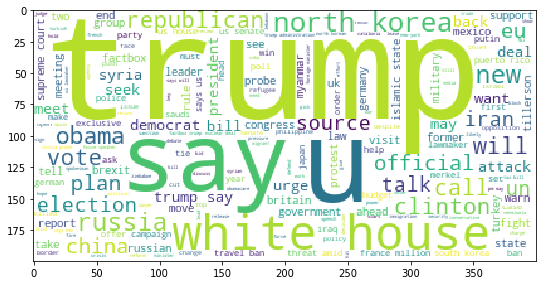

<Figure size 432x288 with 0 Axes>

In [24]:
from wordcloud import WordCloud
wc=WordCloud(background_color = 'white').generate(' '.join(docs1))
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.show()
plt.savefig('true_news_top_words.png')